<a href="https://colab.research.google.com/github/AndoniFikri/Credit-Risk-Prediction-with-Deployment/blob/main/Preprocessing_Data_Set_(DTS_Final_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns=None
pd.options.display.max_rows=None

#Import Data Set

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
df = pd.read_csv('recruitment_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Serial_no           614 non-null    int64  
 1   Gender              601 non-null    object 
 2   Python_exp          611 non-null    object 
 3   Experience_Years    599 non-null    float64
 4   Education           614 non-null    object 
 5   Internship          582 non-null    object 
 6   Score               614 non-null    int64  
 7   Salary * 10E4       593 non-null    float64
 8   Offer_History       564 non-null    float64
 9   Location            614 non-null    object 
 10  Recruitment_Status  614 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 52.9+ KB


In [5]:
df.describe()

,Serial_no,Experience_Years,Score,Salary * 10E4,Offer_History
count,614.000000,599.000000,614.000000,593.000000,564.000000
mean,307.500000,0.762938,5402.302932,146.165261,0.842199
std,177.390811,1.015216,6109.024398,85.726110,0.364878
min,1.000000,0.000000,150.000000,0.000000,0.000000
25%,154.250000,0.000000,2877.500000,100.000000,1.000000
50%,307.500000,0.000000,3812.500000,128.000000,1.000000
75%,460.750000,2.000000,5771.500000,168.000000,1.000000
max,614.000000,3.000000,81000.000000,700.000000,1.000000


In [6]:
df.nunique()

Serial_no             614
Gender                  2
Python_exp              2
Experience_Years        4
Education               2
Internship              2
Score                 505
Salary * 10E4         204
Offer_History           2
Location                3
Recruitment_Status      2
dtype: int64

In [7]:
#Differentiate Categorical and Numerical Feature 
numerical = df.select_dtypes("number").columns.tolist() #Take numerical column name as a list
categorical = df.select_dtypes('object').columns.tolist() #Take categorical column name as a list
print(numerical)
print(categorical)

['Serial_no', 'Experience_Years', 'Score', 'Salary * 10E4', 'Offer_History']
['Gender', 'Python_exp', 'Education', 'Internship', 'Location', 'Recruitment_Status']


# Checking for the missing values

Text(0.5, 1.0, 'Missing Value')

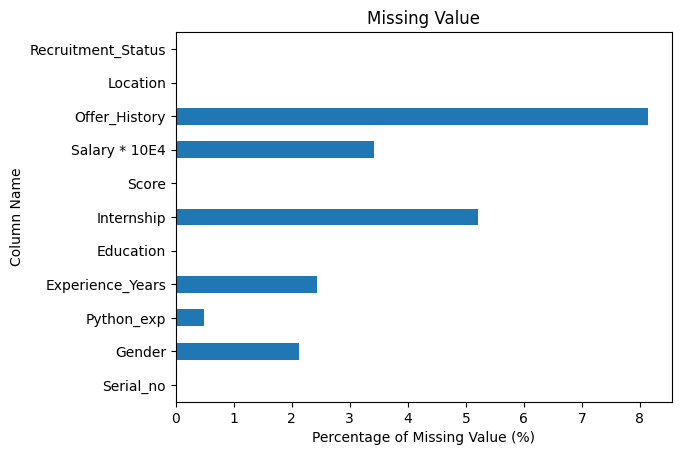

In [8]:
#check for Missing value for each column 
((df.isnull().sum()/len(df))*100).plot(kind='barh')
plt.xlabel('Percentage of Missing Value (%)')
plt.ylabel('Column Name')
plt.title('Missing Value')

In [9]:
#Check for duplicated rows 
df.duplicated().sum()

0

In [10]:
#Drop missing data 
df.dropna(axis=0, inplace=True)

In [11]:
#Recheck for Missing value 
df.isnull().sum()

Serial_no             0
Gender                0
Python_exp            0
Experience_Years      0
Education             0
Internship            0
Score                 0
Salary * 10E4         0
Offer_History         0
Location              0
Recruitment_Status    0
dtype: int64

#EDA

In [12]:
#Data shape after removing missing values 
df.shape

(493, 11)

In [13]:
#Check for Serial_no unique value 
df['Serial_no'].nunique()

493

In [14]:
#Since Serial_no column is unique in every row, we could drop the column because it has no meaning 
df.drop('Serial_no', axis=1, inplace=True)

In [15]:
#Check for Used Column 
df.head()

,Gender,Python_exp,Experience_Years,Education,Internship,Score,Salary * 10E4,Offer_History,Location,Recruitment_Status
0,Male,Yes,0.0,Graduate,No,5139,0.0,1.0,Urban,Y
1,Male,No,1.0,Graduate,No,4583,128.0,1.0,Rural,N
2,Male,No,0.0,Graduate,Yes,3000,66.0,1.0,Urban,Y
3,Male,No,0.0,Not Graduate,No,2583,120.0,1.0,Urban,Y
4,Male,Yes,0.0,Graduate,No,6000,141.0,1.0,Urban,Y


In [16]:
# Simple Exploratory Data Analysis

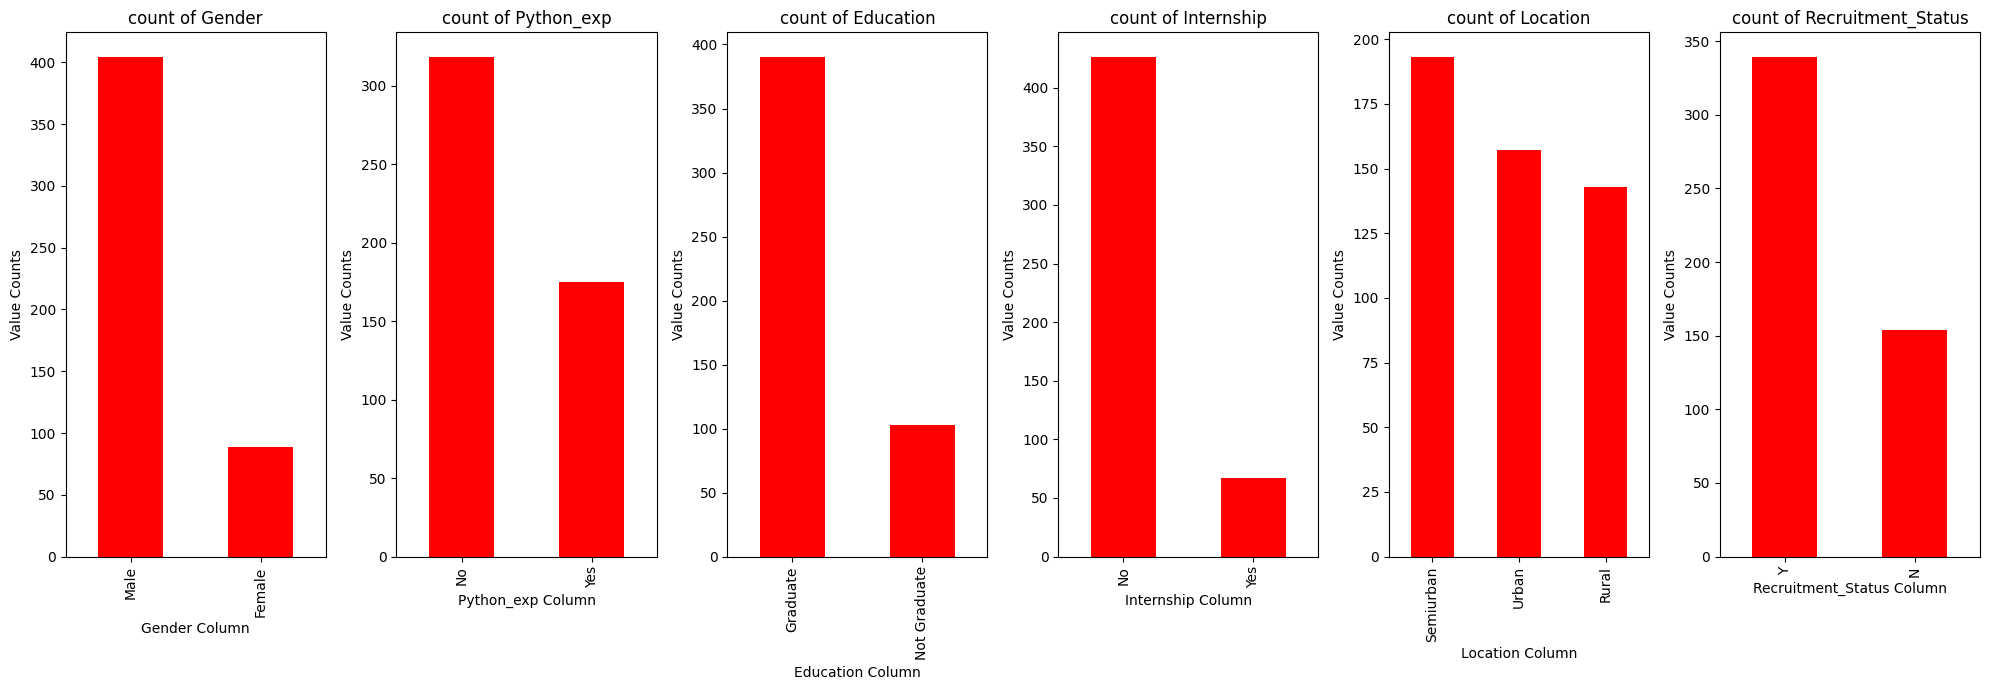

In [17]:
#Value Counts of Categorical Column
fig = plt.figure(figsize=(20,7))
ax_value = []
for x in range(len(categorical)): 
    ax_value.append(f'ax{x}')
                    
for i in range(len(categorical)):
    ax_value[i] = fig.add_subplot(1, len(categorical), i + 1)
    df[categorical[i]].value_counts().plot(kind='bar', color='red', ax=ax_value[i])
    ax_value[i].set_title(f'count of {categorical[i]}')
    ax_value[i].set_xlabel(f'{categorical[i]} Column')
    ax_value[i].set_ylabel('Value Counts')
    plt.tight_layout()
        

In [18]:
#Statistical Summary of Categorical Columns
df[categorical].describe()

,Gender,Python_exp,Education,Internship,Location,Recruitment_Status
count,493,493,493,493,493,493
unique,2,2,2,2,3,2
top,Male,No,Graduate,No,Semiurban,Y
freq,404,318,390,426,193,339


In [19]:
#Since we have already drop Serial_no column,  we have to create a new list consisting the remaining numerical column 
numerical_new = df.select_dtypes('number').columns.tolist()
numerical_new

['Experience_Years', 'Score', 'Salary * 10E4', 'Offer_History']

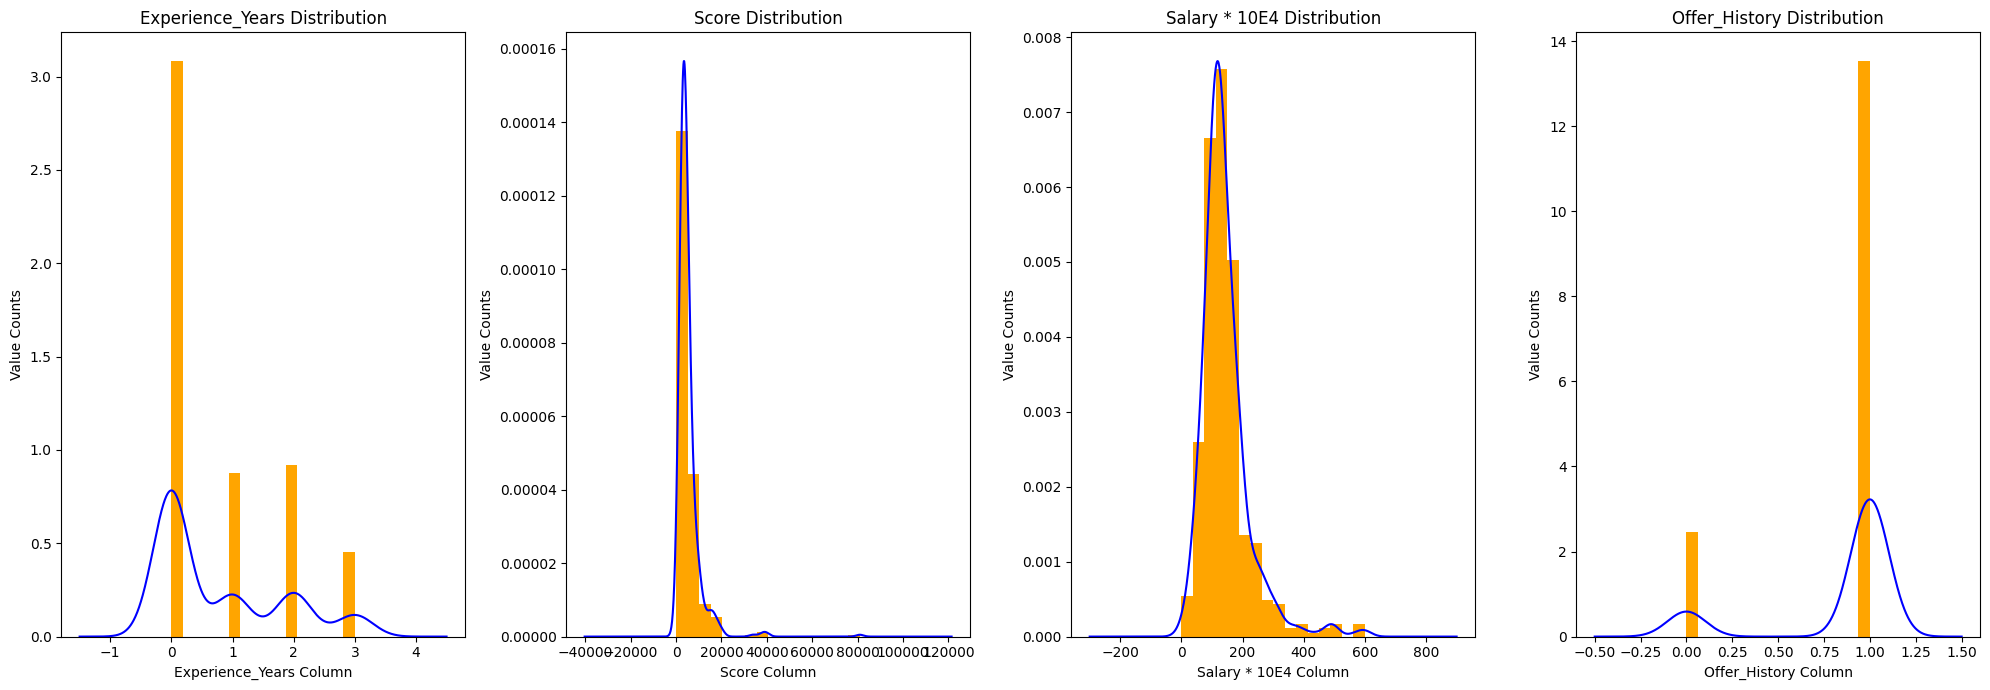

In [20]:
#Distribution Plot for Numerical Column 
fig = plt.figure(figsize=(20,7))
ax_value = []
for x in range(len(numerical_new)): 
    ax_value.append(f'ax{x}')
                    
for i in range(len(numerical_new)):
    ax_value[i] = fig.add_subplot(1, len(numerical_new), i + 1)
    df[numerical_new[i]].plot(kind='kde', color='Blue', ax=ax_value[i])
    df[numerical_new[i]].plot(kind='hist', density=True, bins=16, color='orange', ax=ax_value[i])
    ax_value[i].set_title(f'{numerical_new[i]} Distribution')
    ax_value[i].set_xlabel(f'{numerical_new[i]} Column')
    ax_value[i].set_ylabel('Value Counts')
    plt.tight_layout()

In [21]:
#Statistical Summary of Numerical Feature 
df[numerical_new].describe()

,Experience_Years,Score,Salary * 10E4,Offer_History
count,493.000000,493.000000,493.000000,493.000000
mean,0.764706,5334.087221,143.843813,0.845842
std,1.018833,5602.830386,79.947938,0.361467
min,0.000000,150.000000,0.000000,0.000000
25%,0.000000,2900.000000,100.000000,1.000000
50%,0.000000,3859.000000,128.000000,1.000000
75%,2.000000,5821.000000,170.000000,1.000000
max,3.000000,81000.000000,600.000000,1.000000


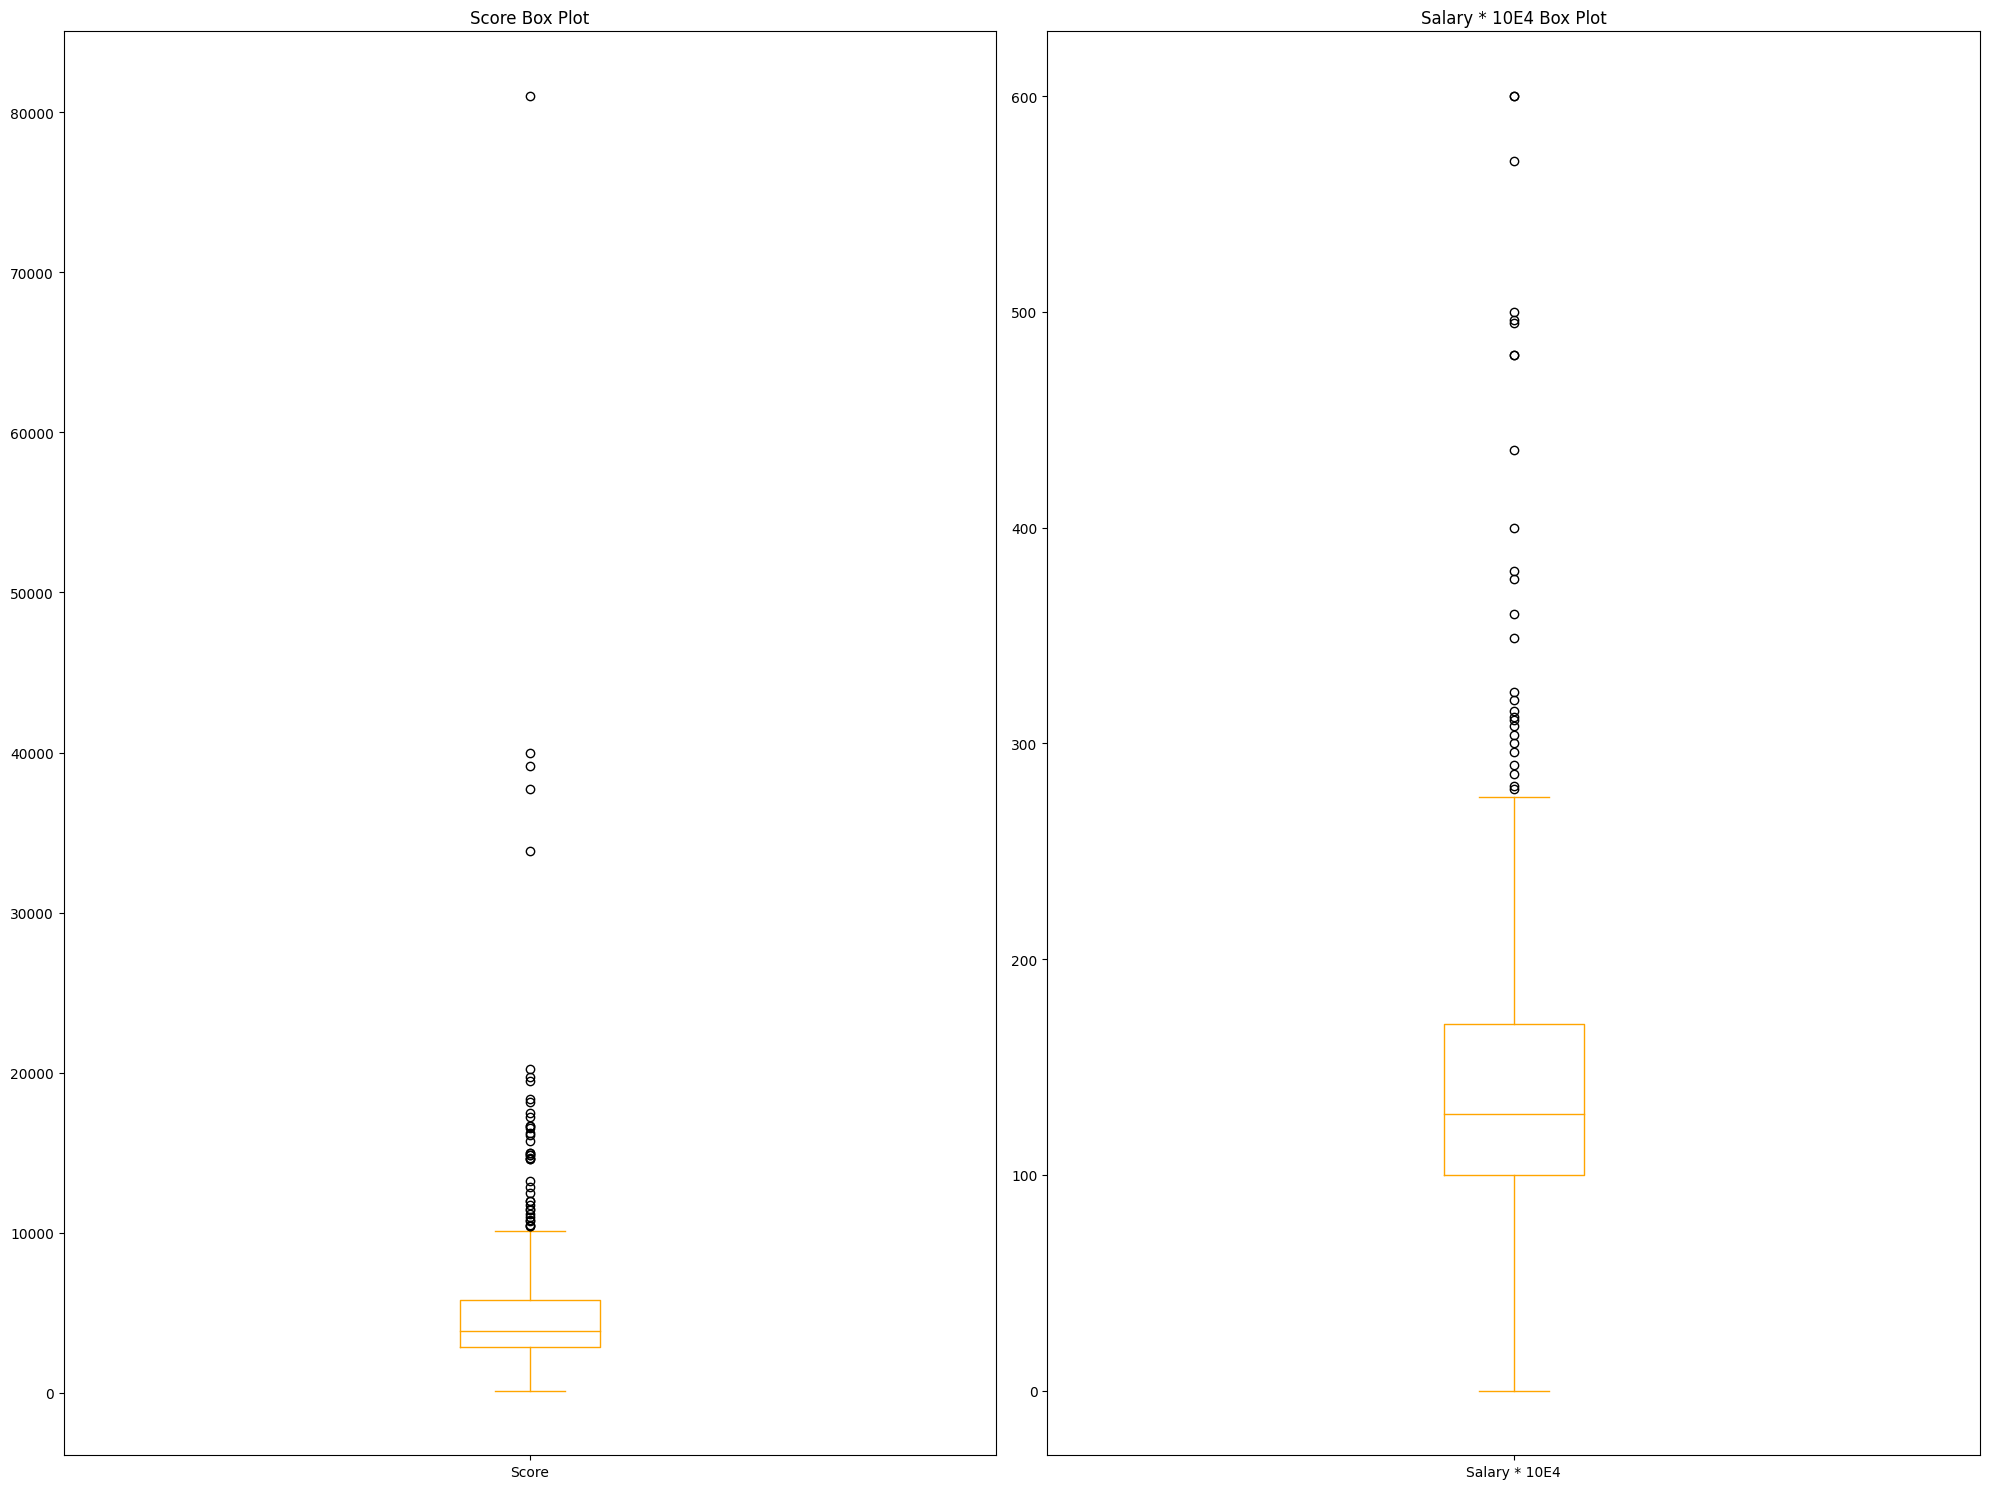

In [22]:
#Boxplot for Continuous Numerical Column
fig = plt.figure(figsize=(20,15))
continous_numerical = ['Score', 'Salary * 10E4']
ax_value = []
for x in range(len(continous_numerical)): 
    ax_value.append(f'ax{x}')
                    
for i in range(len(continous_numerical)):
    ax_value[i] = fig.add_subplot(1, len(continous_numerical), i + 1)
    df[continous_numerical[i]].plot(kind='box', color='orange', ax=ax_value[i])
    ax_value[i].set_title(f'{continous_numerical[i]} Box Plot')
    plt.tight_layout()

C:\Users\20109\AppData\Local\Temp\ipykernel_7408\1106993870.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<AxesSubplot: >

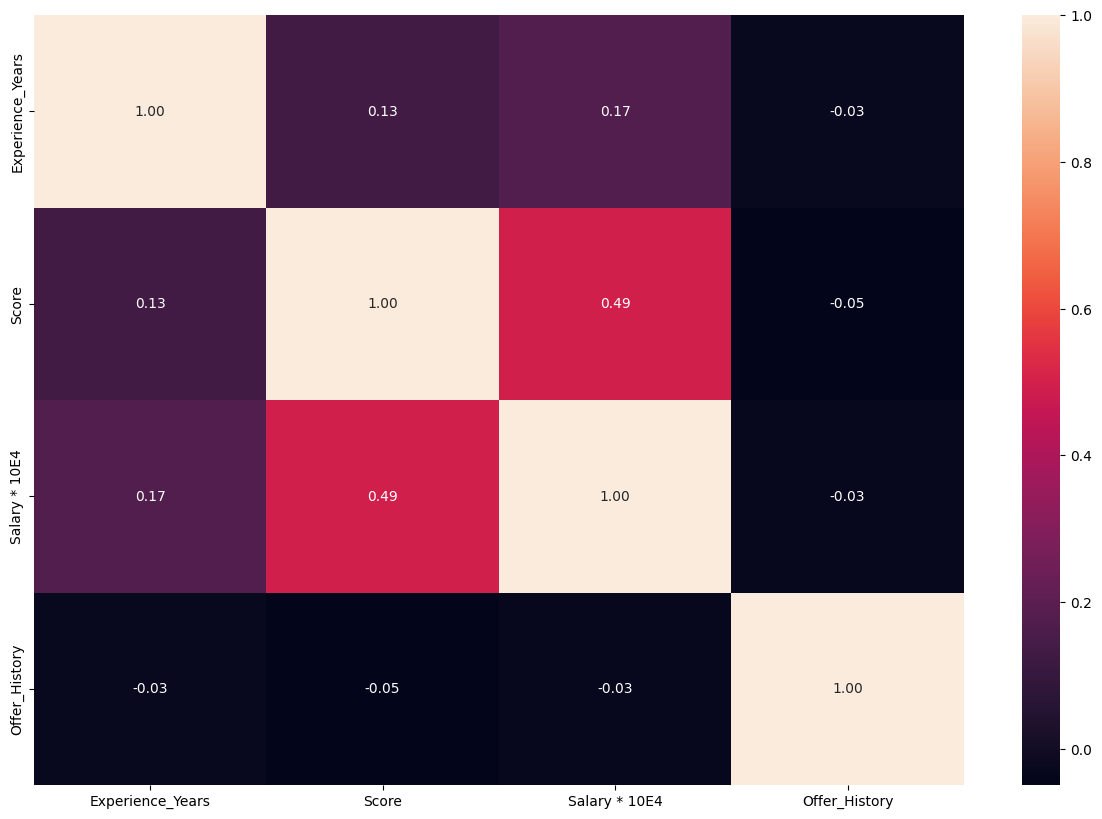

In [23]:
#Plot the Correlation Matrix for Numerical Column
plt.figure(figsize=(15,10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 613
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              493 non-null    object 
 1   Python_exp          493 non-null    object 
 2   Experience_Years    493 non-null    float64
 3   Education           493 non-null    object 
 4   Internship          493 non-null    object 
 5   Score               493 non-null    int64  
 6   Salary * 10E4       493 non-null    float64
 7   Offer_History       493 non-null    float64
 8   Location            493 non-null    object 
 9   Recruitment_Status  493 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 42.4+ KB


In [25]:
df['Internship'].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
df['Python_exp'].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
#Endocing Python_exp and internship column 
y_n_enc = {'Yes' : 1, 
          'No' : 0}
df['Internship'] = df['Internship'].map(y_n_enc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 613
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              493 non-null    object 
 1   Python_exp          493 non-null    object 
 2   Experience_Years    493 non-null    float64
 3   Education           493 non-null    object 
 4   Internship          493 non-null    int64  
 5   Score               493 non-null    int64  
 6   Salary * 10E4       493 non-null    float64
 7   Offer_History       493 non-null    float64
 8   Location            493 non-null    object 
 9   Recruitment_Status  493 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 42.4+ KB


In [28]:
df['Python_exp'] = df['Python_exp'].map(y_n_enc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 613
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              493 non-null    object 
 1   Python_exp          493 non-null    int64  
 2   Experience_Years    493 non-null    float64
 3   Education           493 non-null    object 
 4   Internship          493 non-null    int64  
 5   Score               493 non-null    int64  
 6   Salary * 10E4       493 non-null    float64
 7   Offer_History       493 non-null    float64
 8   Location            493 non-null    object 
 9   Recruitment_Status  493 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 42.4+ KB


In [29]:
#Recruitment_Status Unique Value 
df['Recruitment_Status'].unique()

array(['Y', 'N'], dtype=object)

In [30]:
#Binary Encoding for Recruitment_Status Column 
rec_enc = {'Y' : 1, 
          'N' : 0}
df['Recruitment_Status'] = df['Recruitment_Status'].map(rec_enc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 613
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              493 non-null    object 
 1   Python_exp          493 non-null    int64  
 2   Experience_Years    493 non-null    float64
 3   Education           493 non-null    object 
 4   Internship          493 non-null    int64  
 5   Score               493 non-null    int64  
 6   Salary * 10E4       493 non-null    float64
 7   Offer_History       493 non-null    float64
 8   Location            493 non-null    object 
 9   Recruitment_Status  493 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 42.4+ KB


# Gender Column

In [31]:
#Gender Column Unique Value 
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [32]:
#Binary Encoding for Gender Column 
gen_enc = {'Male' : 1, 
          'Female' : 0}
df['Gender'] = df['Gender'].map(gen_enc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 613
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              493 non-null    int64  
 1   Python_exp          493 non-null    int64  
 2   Experience_Years    493 non-null    float64
 3   Education           493 non-null    object 
 4   Internship          493 non-null    int64  
 5   Score               493 non-null    int64  
 6   Salary * 10E4       493 non-null    float64
 7   Offer_History       493 non-null    float64
 8   Location            493 non-null    object 
 9   Recruitment_Status  493 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 42.4+ KB


# Education Column

In [33]:
#Education Column Unique Valie 
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [34]:
#Binary Encoding for Education Column 
ed_enc = {'Graduate' : 1, 
          'Not Graduate' : 0}
df['Education'] = df['Education'].map(ed_enc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 613
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              493 non-null    int64  
 1   Python_exp          493 non-null    int64  
 2   Experience_Years    493 non-null    float64
 3   Education           493 non-null    int64  
 4   Internship          493 non-null    int64  
 5   Score               493 non-null    int64  
 6   Salary * 10E4       493 non-null    float64
 7   Offer_History       493 non-null    float64
 8   Location            493 non-null    object 
 9   Recruitment_Status  493 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 42.4+ KB


# Location Column

In [35]:
#Location Unique Value 
df['Location'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

**Possible Action:** Because candidates who live in Urban Place has a higher tendency to become a top candidate (Urban Education is better than rural and also its has better competitiveness). Thus, we should perform ordinal encoding for this column.   

Rank for Ordinal Encoding: 

Urban (Highest) -> Semiurban -> Rural

In [36]:
#Ordinal Encoding for Location Column 
loc_enc = {'Urban':3, 
          'Semiurban' : 2, 
          'Rural' : 1}
df['Location'] = df['Location'].map(loc_enc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 613
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              493 non-null    int64  
 1   Python_exp          493 non-null    int64  
 2   Experience_Years    493 non-null    float64
 3   Education           493 non-null    int64  
 4   Internship          493 non-null    int64  
 5   Score               493 non-null    int64  
 6   Salary * 10E4       493 non-null    float64
 7   Offer_History       493 non-null    float64
 8   Location            493 non-null    int64  
 9   Recruitment_Status  493 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 42.4 KB


In [37]:
#Download Preprocessed Data Set
from IPython.display import FileLink
# Import a module to delete the file
import os
# Create a download function
def csv_download_link(df, csv_file_name, delete_prompt=True):
    """Display a download link to load a data frame as csv within a Jupyter notebook

    Parameters
    ----------
    df : pandas data frame
    csv_file_name : str
    delete_prompt : bool
    """
    df.to_csv(csv_file_name, index=False)
    display(FileLink(csv_file_name))
    if delete_prompt:
        a = input('Press enter to delete the file after you have downloaded it.')
        os.remove(csv_file_name)


# Use the function to diplay a download link
csv_download_link(df, 'cleaned Recruitment.csv')

c:\Users\20109\Desktop\project deployment\Credit-Risk-Prediction-with-Deployment-main\cleaned Recruitment.csv